In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
master_df = pd.read_csv("../output/master_df.csv")
master_df.head()

,distname,schoolname,flag_nerds,flag_f33,ncesenroll,gradespan,pp_stloc_raw_MA,pp_fed_raw_MA,pp_total_raw_MA,schoolstloc_raw_MA,...,Females (%),Males (%),FTE Count,student_teacher_ratio,nan_flag,District Name,District Code,Salary Totals,Average Salary,FTE Count_teacher_salary
0,Abington,Abington High,0,0,545.0,09-12,14880.475672,20.812074,14901.287746,8.052652e+06,...,72.5,27.5,62.4,14.4,False,Abington,10000.0,"$11,469,788","$93,861",122.2
1,Abington,Abington Middle School,0,0,672.0,05-08,13057.825084,83.417661,13141.242745,8.839857e+06,...,77.3,22.7,73.7,17.6,False,Abington,10000.0,"$11,469,788","$93,861",122.2
2,Abington,Woodsdale Elementary School,0,0,294.0,03-04,13201.700857,499.583587,13701.284443,3.841768e+06,...,88.8,11.2,39.4,18.0,False,Abington,10000.0,"$11,469,788","$93,861",122.2
3,Acton-Boxborough,Acton-Boxborough Regional High,0,0,1837.0,09-12,14634.333856,191.007988,14825.341844,2.676628e+07,...,76.1,23.9,195.0,14.7,False,Acton-Boxborough,6000000.0,"$32,945,978","$86,677",380.1
4,Acton-Boxborough,Blanchard Memorial School,0,0,464.0,KG-06,16005.357328,289.306328,16294.663656,7.481971e+06,...,91.4,8.6,79.3,14.3,False,Acton-Boxborough,6000000.0,"$32,945,978","$86,677",380.1


## 2.1 Cluster Analysis - General Insight Extraction

### 2.1.1 KMeans - Economic and Race Features Only - 2 Clusters

In [39]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# # fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# # group by the 'cluster' column and calculate the median value of each column for the rows in cluster 0
# cluster_0_median_values = cluster_0.groupby('cluster').median()
# print(cluster_0_median_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# # group by the 'cluster' column and calculate the median value of each column for the rows in cluster 0
# cluster_1__median_values = cluster_1.groupby('cluster').median()
# print(cluster_1__median_values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    1143
1     310
Name: cluster, dtype: int64
         High Needs #.1  Economically Disadvantaged %  African American (%)  \
cluster                                                                       
0             37.156255                     21.836833              0.775503   

         Asian (%)  Hispanic (%)  White (%)  Native American (%)  
cluster                                                           
0         0.897463      1.353018  96.506474              0.05713  
         High Needs #.1  Economically Disadvantaged %  African American (%)  \
cluster                                                                       
1             78.487419                     63.215484              9.129032   

         Asian (%)  Hispanic (%)  White (%)  Native American (%)  
cluster                                                           
1             1.97     10.294194  77.547742             0.199355  


### 2.1.2 KMeans - Economic and Race Features Only - 3 Clusters

In [40]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# # fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 1
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# filter the dataframe to only include rows in cluster 2
cluster_2 = correlations[correlations['cluster'] == 2]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 2
cluster_2_mean_values = cluster_2.groupby('cluster').mean()
print(cluster_2_mean_values)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    974
2    364
1    115
Name: cluster, dtype: int64
         High Needs #.1  Economically Disadvantaged %  African American (%)  \
cluster                                                                       
0             32.685626                     17.544456              0.706674   

         Asian (%)  Hispanic (%)  White (%)  Native American (%)  
cluster                                                           
0         0.896612      1.139528  96.816838              0.05616  
         High Needs #.1  Economically Disadvantaged %  African American (%)  \
cluster                                                                       
1             77.755652                     64.491304             17.170435   

         Asian (%)  Hispanic (%)  White (%)  Native American (%)  
cluster                                                           
1         3.061739     15.717391   63.00087             0.310435  
         High Needs #.1  Economically Disadvantaged %  African Amer

### 2.1.3 KMeans - Economic and Race Features Only - 4 Clusters

In [42]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# # fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 1
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# filter the dataframe to only include rows in cluster 2
cluster_2 = correlations[correlations['cluster'] == 2]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 2
cluster_2_mean_values = cluster_2.groupby('cluster').mean()
print(cluster_2_mean_values)

# filter the dataframe to only include rows in cluster 3
cluster_3 = correlations[correlations['cluster'] == 3]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 3
cluster_3_mean_values = cluster_3.groupby('cluster').mean()
print(cluster_3_mean_values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    968
2    352
1    105
3     28
Name: cluster, dtype: int64
         High Needs #.1  Economically Disadvantaged %  African American (%)  \
cluster                                                                       
0                 32.85                     17.701756              0.692459   

         Asian (%)  Hispanic (%)  White (%)  Native American (%)  
cluster                                                           
0         0.883781      1.128926  96.881405             0.027583  
         High Needs #.1  Economically Disadvantaged %  African American (%)  \
cluster                                                                       
1             77.713333                      64.98381             17.850476   

         Asian (%)  Hispanic (%)  White (%)  Native American (%)  
cluster                                                           
1          2.71619     16.198095   62.31619             0.160952  
         High Needs #.1  Economically Disadvantaged %  Afr

### 2.1.4 KMeans - All Features - 3 Clusters

In [44]:
# select the columns you want to calculate correlation with
from sklearn.cluster import KMeans

columns_of_interest = ['pp_stloc_raw_MA', 'pp_fed_raw_MA','First Language Not English %', 'student_teacher_ratio','High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
df_standardized

# # fit the k-means algorithm on the standardized data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_standardized)

# get the cluster labels for each school
cluster_labels = kmeans.labels_

# add the cluster labels as a new column to the original dataframe
correlations['cluster'] = cluster_labels

# calculate the mean values of each feature for each cluster
cluster_means = correlations.groupby('cluster').mean()

# explanatory analysis
print(correlations['cluster'].value_counts())

# filter the dataframe to only include rows in cluster 0
cluster_0 = correlations[correlations['cluster'] == 0]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 0
cluster_0_mean_values = cluster_0.groupby('cluster').mean()
print(cluster_0_mean_values)

# filter the dataframe to only include rows in cluster 1
cluster_1 = correlations[correlations['cluster'] == 1]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 1
cluster_1_mean_values = cluster_1.groupby('cluster').mean()
print(cluster_1_mean_values)

# filter the dataframe to only include rows in cluster 2
cluster_2 = correlations[correlations['cluster'] == 2]

# group by the 'cluster' column and calculate the mean value of each column for the rows in cluster 2
cluster_2_mean_values = cluster_2.groupby('cluster').mean()
print(cluster_2_mean_values)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    1025
2     319
1     107
Name: cluster, dtype: int64
         pp_stloc_raw_MA  pp_fed_raw_MA  First Language Not English %  \
cluster                                                                 
0           16011.051963     353.991634                      9.356195   

         student_teacher_ratio  High Needs #.1  Economically Disadvantaged %  \
cluster                                                                        
0                    12.877854       33.834244                     18.865854   

         African American (%)  Asian (%)  Hispanic (%)  White (%)  \
cluster                                                             
0                    0.770927   0.888976      1.221561  96.657854   

         Native American (%)  
cluster                       
0                   0.053366  
         pp_stloc_raw_MA  pp_fed_raw_MA  First Language Not English %  \
cluster                                                                 
1           20510.664092    1573.1

### 2.1.5 Hierarchy - Economic and Race Features Only - Nonstandardized Data

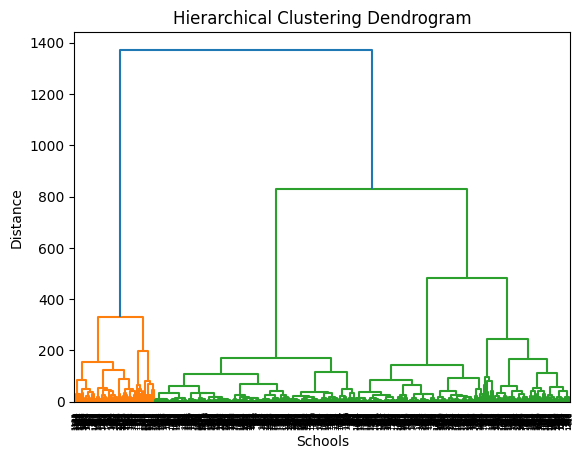

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

# df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(correlations, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


### 2.1.6 Hierarchy - Economic and Race Features Only - Standardized Data

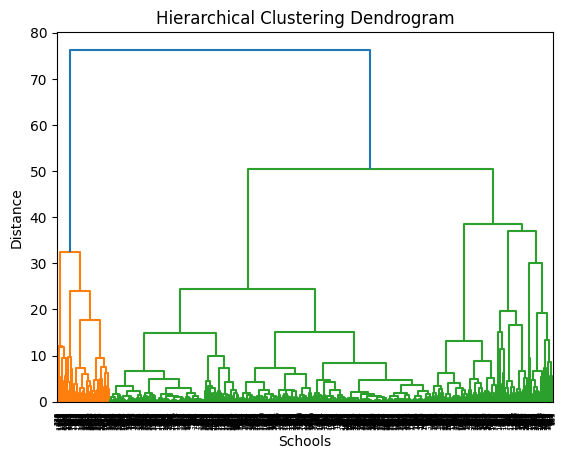

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(df_standardized, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


### 2.1.7 Hierarchy - All Features (not yet) - Nonstandardized Data

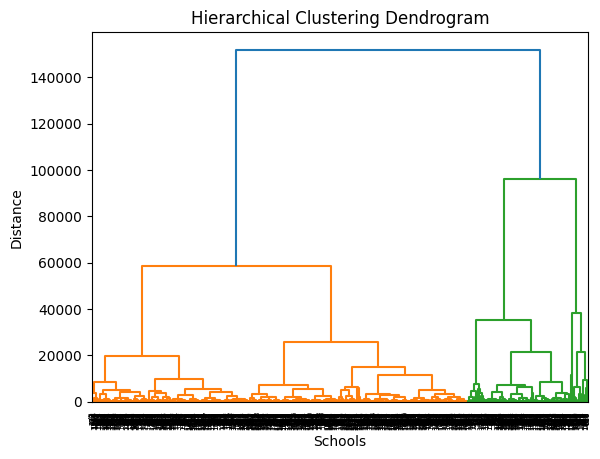

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['pp_stloc_raw_MA', 'pp_fed_raw_MA','First Language Not English %', 'student_teacher_ratio','High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

# df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(correlations, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


### 2.1.8 Hierarchy - All Features (not yet) - Standardized Data

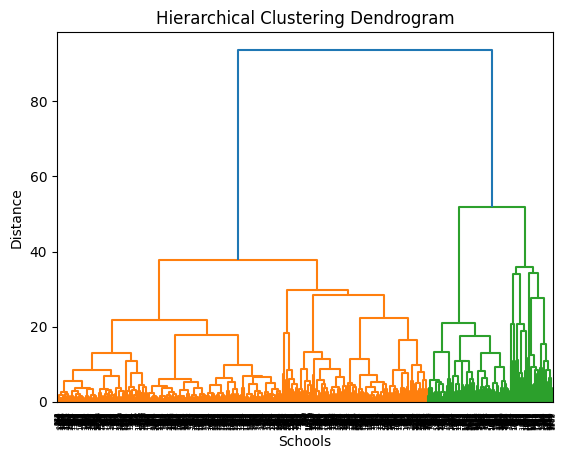

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

columns_of_interest = ['pp_stloc_raw_MA', 'pp_fed_raw_MA','First Language Not English %', 'student_teacher_ratio','High Needs #.1', 'Economically Disadvantaged %', 'African American (%)', 'Asian (%)', 'Hispanic (%)', 'White (%)', 'Native American (%)']

# calculate the correlations between the selected columns and the test performance column
correlations = master_df[columns_of_interest]
correlations = correlations.dropna()

df_standardized = (correlations - correlations.mean()) / correlations.std()
# df_standardized

# Perform hierarchical clustering
Z = linkage(df_standardized, method='ward')

# Plot the dendrogram to visualize the clusters
dendrogram(Z)

# Add labels to the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Schools')
plt.ylabel('Distance')

# Show the plot
plt.show()


## 2.2 Are there differences in trends between elementary schools, middle schools, and high schools?

In [ ]:
# to-do: compare the linear fit lines for major features between elementary schools, middle schools, and high schools

## 2.3 What type of features do high performing, high income schools have?

### 2.3.1 Finding Mean / Median Values

In [ ]:
# to-do: calculate the top 20 percentile of performing schools and calculate their average feature values

# to-do: calculate the top 20 percentile of performing elementary schools and calculate their average feature values

# to-do: calculate the top 20 percentile of performing middle schools and calculate their average feature values

# to-do: calculate the top 20 percentile of performing high schools and calculate their average feature values

### 2.3.2 Using Cluster Analysis

In [ ]:
# to-do: filter by top 20 percentile of schools and find the primary clusters if k=2 or k=3 or k=4

# to-do: filter by top 20 percentile of elementary schools and find the primary clusters if k=2 or k=3 or k=4

# to-do: filter by top 20 percentile of middle schools and find the primary clusters if k=2 or k=3 or k=4

# to-do: filter by top 20 percentile of high schools and find the primary clusters if k=2 or k=3 or k=4

## 2.4 What type of features do high performing, low income schools have?

repeat same process as 2.3

## 2.5 What type of features do low performing, low income schools have?

repeat same process as 2.3

## 2.5 What type of features do low performing, high income schools have?

repeat same process as 2.3